## Importing the Data

In [1]:
# Import all the Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

# Feature Engineering 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split

# handle Imbalanced Data
from imblearn.over_sampling import RandomOverSampler

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Hyper-Tuning 
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the Data
df=pd.read_csv("case_study_data.csv")
df.head()

,user_id,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,...,hours_per_week,approved,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
0,307c73a3-0c67-43b5-b0d1,Female,03/01/87,Private,11th,7,Never-married,Sales,Unmarried,0,...,17,0,"45424 Norris Common Apt. 390\nNorth Mike, AR 8...",vasquezleah@yahoo.com,7.0,PVT,5,NaN,1.0,R
1,519481f1-604d-48b6-aa47,Male,07/01/70,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Craft-repair,Husband,0,...,48,0,"5022 Rebecca Haven Apt. 258\nThompsonfurt, CT ...",johnsontrevor@hotmail.com,13.0,NBF,5,NaN,1.0,R
2,f66fe2c6-53e3-46ce-8321,Male,06/01/73,Private,HS-grad,9,Divorced,Sales,Not-in-family,0,...,50,0,"8780 Brown Loaf Apt. 099\nNorth David, NJ 56510",morganemily@gmail.com,13.0,NBF,5,NaN,1.0,R
3,91360ed7-72d1-4f6e-b492,Female,30/12/01,Private,11th,7,Never-married,Sales,Own-child,0,...,15,0,721 Jackson Extensions Suite 995\nNew Taraside...,agarcia@hotmail.com,13.0,NBF,5,NaN,1.0,R
4,0e1977f3-3bef-4283-8d0a,Male,03/01/86,Private,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,0,...,50,0,"935 Burch Divide\nLake Bobbyfurt, VT 14128",shermanmeredith@gmail.com,13.0,PVT,47,S,1.0,I


In [3]:
df.shape

(45222, 21)

In [4]:
df.describe()

,education_num,capital_gain,capital_loss,hours_per_week,approved,inquiry_purpose_code,account_type,asset_code
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,43931.000000,45222.000000,45140.000000
mean,10.118460,1101.430344,88.595418,40.938017,0.247844,28.936560,79.807019,1.063735
std,2.552881,7506.430084,404.956092,12.007508,0.431766,35.393095,143.951963,0.711637
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,1.000000
25%,9.000000,0.000000,0.000000,40.000000,0.000000,13.000000,5.000000,1.000000
50%,10.000000,0.000000,0.000000,40.000000,0.000000,13.000000,5.000000,1.000000
75%,13.000000,0.000000,0.000000,45.000000,0.000000,16.000000,173.000000,1.000000
max,16.000000,99999.000000,4356.000000,99.000000,1.000000,99.000000,999.000000,19.000000


## Checking Null Values

In [5]:
df.isnull().sum()/len(df)

user_id                 0.000000
gender                  0.000000
date_of_birth           0.000000
workclass               0.000000
education_level         0.000000
education_num           0.000000
marital_status          0.000000
occupation              0.000000
relationship            0.000000
capital_gain            0.000000
capital_loss            0.000000
hours_per_week          0.000000
approved                0.000000
address                 0.000000
email                   0.000000
inquiry_purpose_code    0.028548
institute_type          0.000000
account_type            0.000000
asset_class_cd          0.790102
asset_code              0.001813
portfolio_type          0.000133
dtype: float64

We do have null values in some of the credit bureau data points. that will handle later in the upcoming stages.

## Exploratory Data Analysis

<AxesSubplot:xlabel='approved', ylabel='count'>

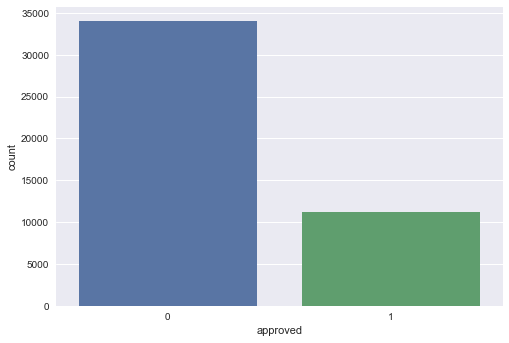

In [6]:
sns.countplot(df['approved'])

 As we can clearly see the indication of imbalance data, it may give wrong predictions so we have to handle this problem before going to train any model.
 
 75% users are the one who didn't get approved, let's get into the further drill down for better understanding.

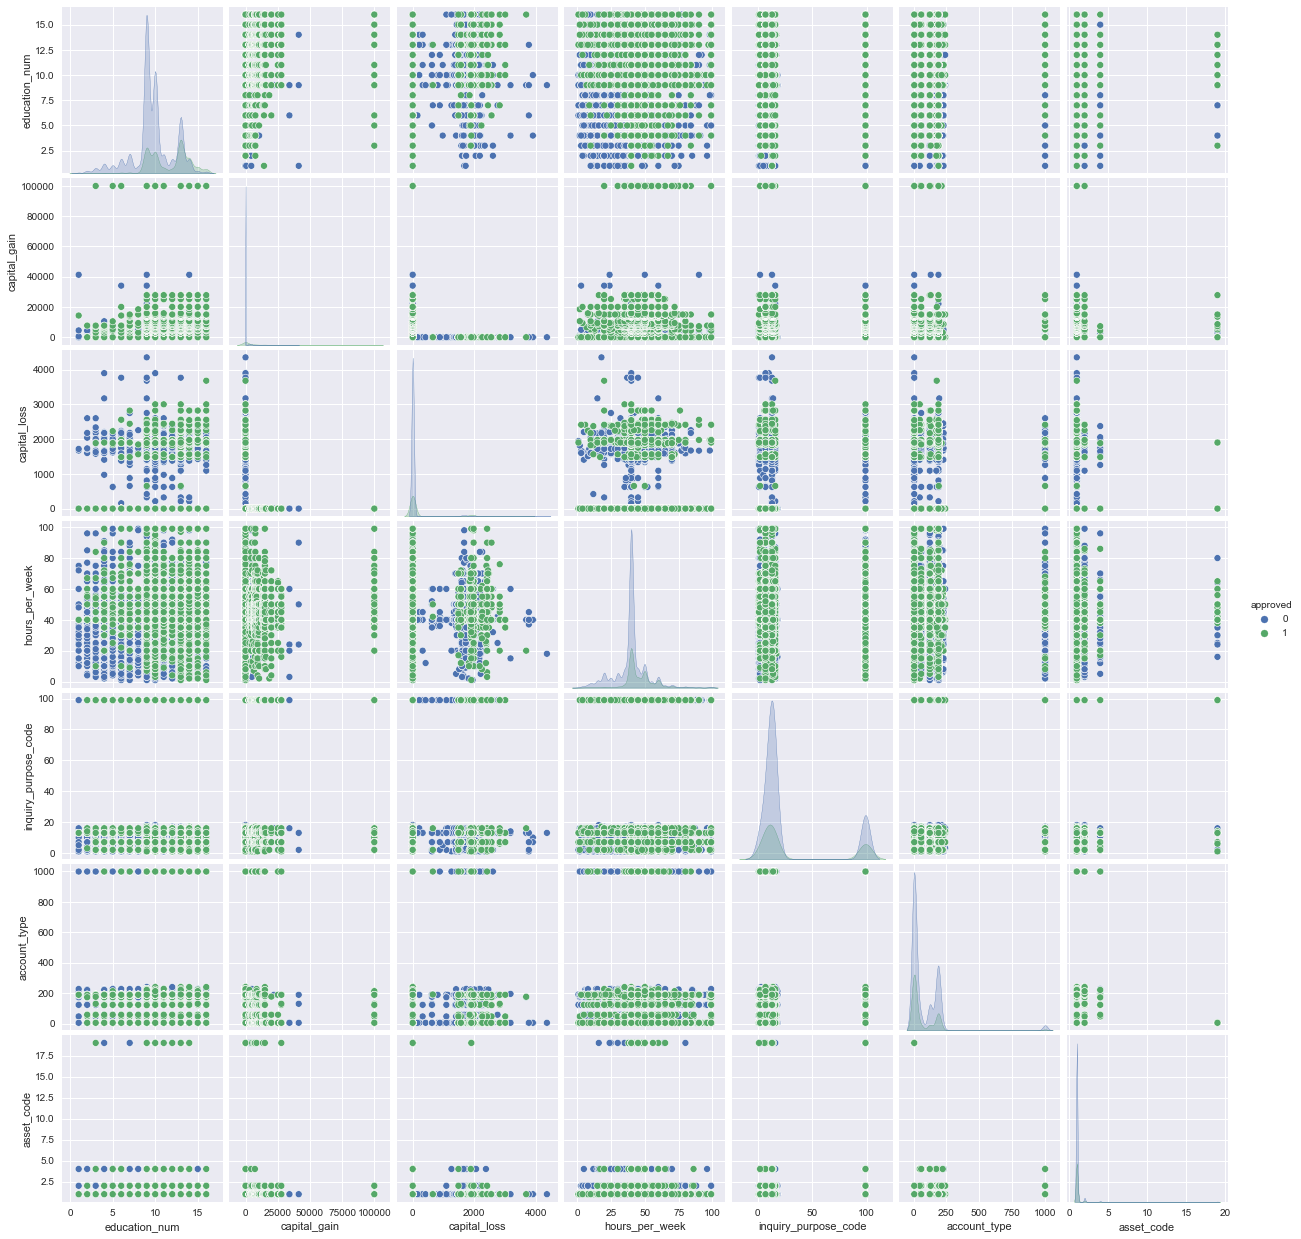

In [7]:
sns.pairplot(df,hue='approved')

It's very difficult to analyze the data by pair plot, let's compare all the parameters one by one with our target label i.e "aprroved".

Will devide our comparision by categorical and numerical variables

In [8]:
categorical=[]
numerical=[]
for i in df.columns:
    if df[i].dtype=="O":
        categorical.append(i)
    else:
        numerical.append(i)
        
print('Categorical Features are: ',categorical)
print(100*"-")
print('Numerical Features are: ',numerical)

Categorical Features are:  ['user_id', 'gender', 'date_of_birth', 'workclass', 'education_level', 'marital_status', 'occupation', 'relationship', 'address', 'email', 'institute_type', 'asset_class_cd', 'portfolio_type']
----------------------------------------------------------------------------------------------------
Numerical Features are:  ['education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'approved', 'inquiry_purpose_code', 'account_type', 'asset_code']


<AxesSubplot:xlabel='gender', ylabel='count'>

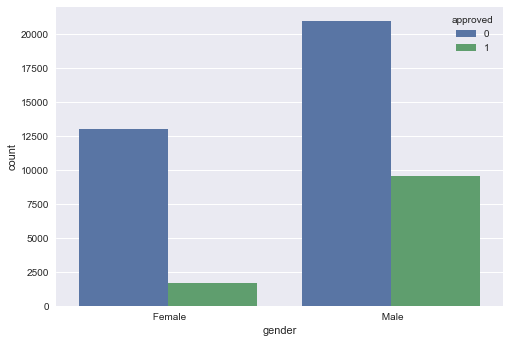

In [9]:
sns.countplot(df['gender'],hue=df['approved'])

We can see almost males are dominating females with higher number of approval. though males participants are higher than females.

<Figure size 720x1152 with 0 Axes>

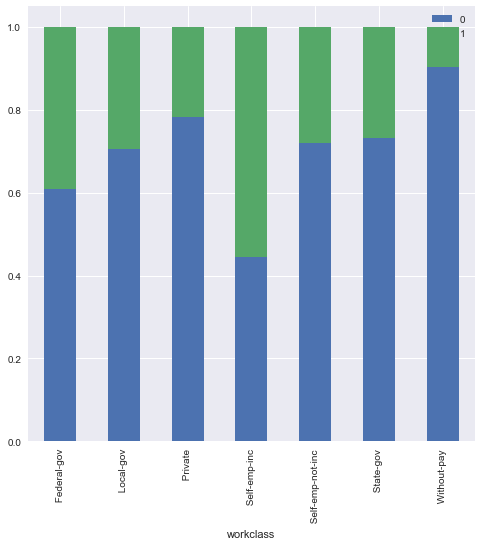

In [10]:
plt.figure(figsize=(10,16))
exp=pd.crosstab(df['workclass'],df['approved']) 
exp.div(exp.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(8,8))
plt.legend(loc='best')


If we talk about the workclass, a person who is working in private company is applying for the credit cards more than any other sector. but most approvals are getting by a person who is in business or working for himself/herself.

<AxesSubplot:xlabel='count', ylabel='education_level'>

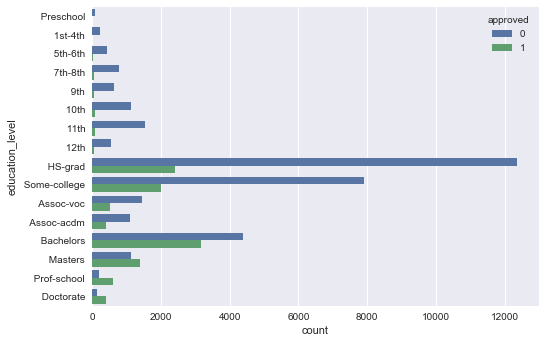

In [11]:
sns.countplot(y=df[['education_level','approved','education_num']].sort_values(by='education_num',ascending=True)
              ['education_level'],hue=df['approved'])


Approvals rate for the bachelors are much higher than whose are from other educational background, though we can see more participants are the one whose are High School Graduate or have done graduation from some college. 

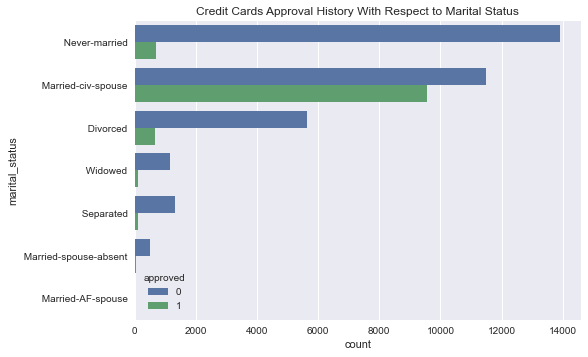

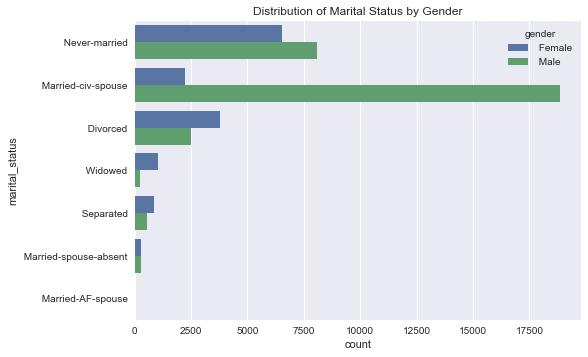

In [12]:

sns.countplot(y=df['marital_status'],hue=df['approved'])
plt.title('Credit Cards Approval History With Respect to Marital Status')
plt.show()

sns.countplot(y=df['marital_status'],hue=df['gender'])
plt.title('Distribution of Marital Status by Gender')
plt.show()


bachelors are the one whose are applying more for the credit cards but the approvals rate is higher for married people.

<AxesSubplot:xlabel='count', ylabel='occupation'>

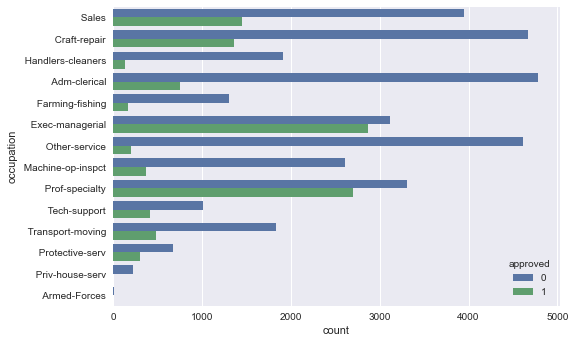

In [13]:
sns.countplot(y=df['occupation'],hue=df['approved'])

it's clearly catching our eye that whoever is at manegement level getting easily approval of credit cards as thier salary would be higher than the other professionals. 

<AxesSubplot:xlabel='count', ylabel='relationship'>

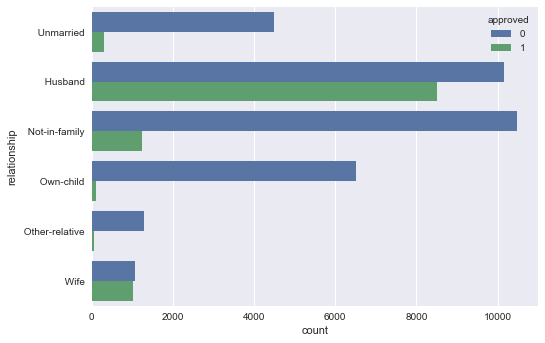

In [14]:
sns.countplot(y=df['relationship'],hue=df['approved'])

As we have checked all the parameters that were given except the age and the Capital, We don't have age given in the data so will append column as an age of the user which we will calculate by thier DOB.

### Note:
Date conversion won't be possible by any of datetime module as we have data with having date of birth is 69 years ago,if we use then 69 year will get converted into 2069 instead of 1969. so we need to clean and we have to make proper format to proceed further

In [15]:

# make a column for today's date to take a difference

df['today_date']=datetime.date.today()

df['today_date']=pd.to_datetime(df['today_date'])

# cleaning the date and making it in proper format

day=[]
month=[]
year=[]
for i in df['date_of_birth']:
    day.append(i.split('/')[0])
    month.append(i.split('/')[1])
    year.append(i.split('/')[2])

df['day']=day
df['month']=month
df['year']=year

df['year']=df['year'].astype('int')

conditions = [
    df['year'] <= 22,
    df['year']>22
]

choices = [2000,1900]

df['new_column'] = np.select(conditions, choices)

df['years']=df['new_column']+df['year']

df['years']=df['years'].astype('str')

df['DOB']=df['day']+"/"+df['month']+"/"+df['years']

df['DOB']=pd.to_datetime(df['DOB'])

#Finally We got the Age of each users.

df['age']=(df['today_date']-df['DOB']).dt.days//365

<AxesSubplot:xlabel='age', ylabel='Density'>

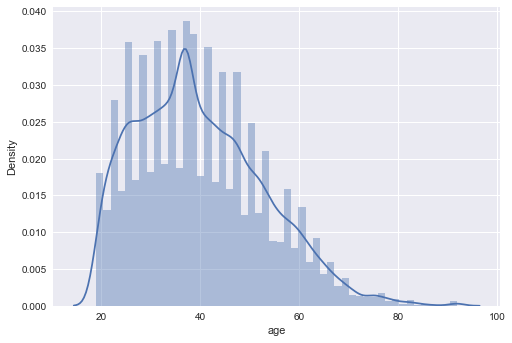

In [16]:
sns.distplot(df['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

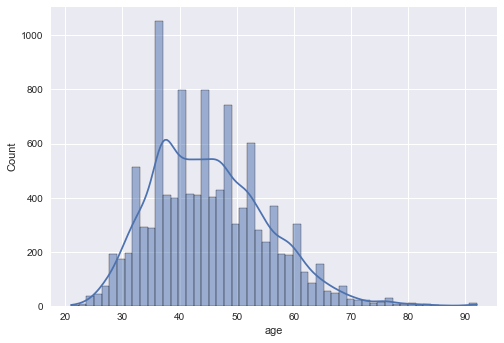

In [17]:
sns.histplot(df[df['approved']==1]['age'],kde=True)

We can see the distribution is behaving like a guassian one as we wanted, there is a clear indication that the cluster of age between 30-60 are getting higher approvals. we can later create the bins to train our model for better prediction.

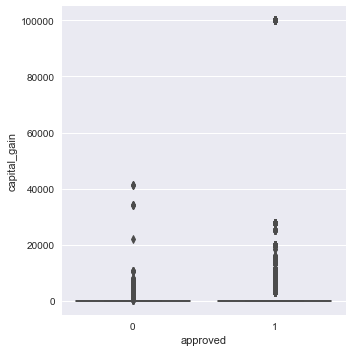

In [18]:
sns.catplot(y="capital_gain", x="approved", kind="box", data=df)

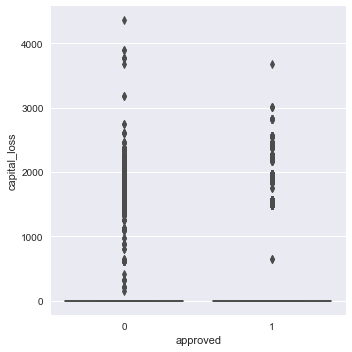

In [19]:
sns.catplot(y="capital_loss", x="approved", kind="box", data=df)

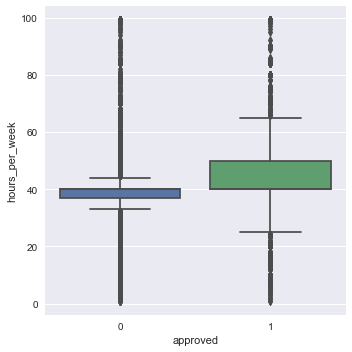

In [20]:
sns.catplot(y="hours_per_week", x="approved", kind="box", data=df)

outliers are present in the capital_gain, capital_loss and work_hours_week, that we need to handle later in the machine learning stage.

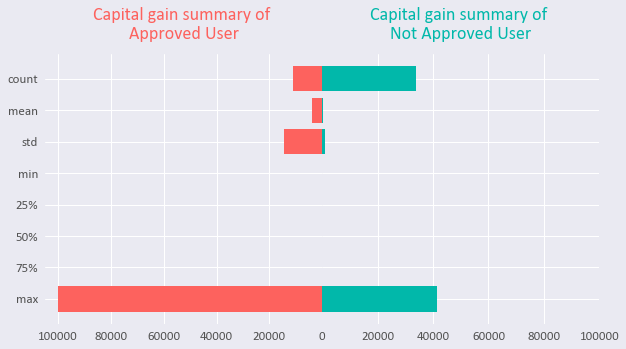

In [21]:
approved=pd.DataFrame(df[df['approved']==1]['capital_gain'].describe())

not_approved=pd.DataFrame(df[df['approved']==0]['capital_gain'].describe())


font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = approved.index
column0 = approved['capital_gain']
column1 = not_approved['capital_gain']
title0 = "Capital gain summary of \nApproved User"
title1 = 'Capital gain summary of \nNot Approved User'


fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()


axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)


# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 

# To show data from highest to lowest
plt.gca().invert_yaxis()


axes[0].set(yticks=approved.index, yticklabels=approved.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color


axes[1].set_xticks([20000, 40000, 60000, 80000,100000])


axes[1].set_xticklabels([20000, 40000, 60000, 80000,100000])

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
    
    
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)






the user who is getting higher capital through the investment will get a higher probability of getting approved for the credit cards

In [22]:
# We have age column with us so we can delete DOB and other unnecessary columns that we have created.

df.drop(['today_date', 'day',
       'month', 'year', 'new_column', 'years', 'DOB','date_of_birth','user_id'],axis=1,inplace=True)

<AxesSubplot:xlabel='hours_per_week', ylabel='education_level'>

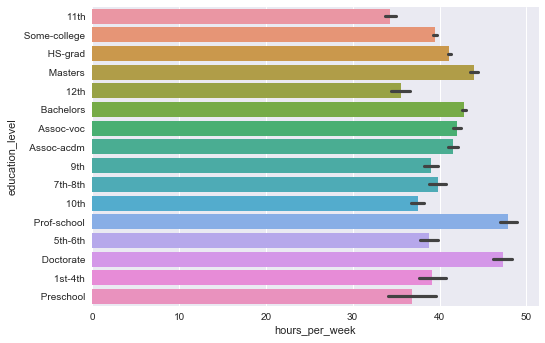

In [23]:
sns.barplot(y='education_level',x='hours_per_week',data=df)

<AxesSubplot:xlabel='hours_per_week', ylabel='workclass'>

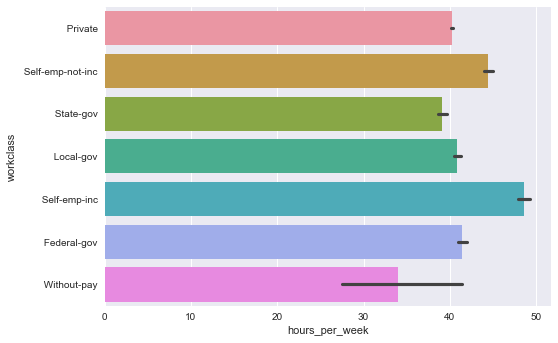

In [24]:
sns.barplot(y='workclass',x='hours_per_week',data=df)

## Checking is there any positive or negative correlation with variables

<AxesSubplot:>

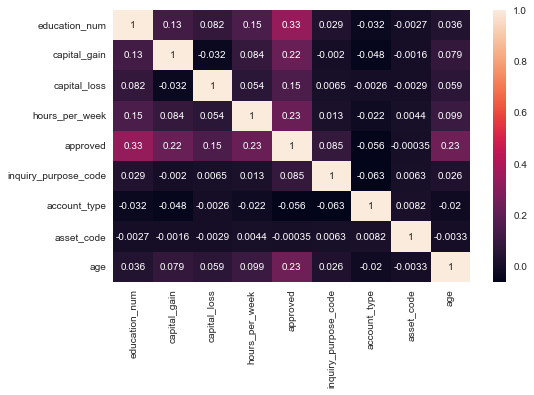

In [25]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)

Not a single column is highly correlated with the approved, though educational background does matter to get approval for the credit cards 

Now we are ready for the machine learning steps as we have analyze all the details that data had.

## Machine Learning Process

### Handling the null values

In [26]:
df.isnull().sum()[df.isnull().sum()>0].index

Index(['inquiry_purpose_code', 'asset_class_cd', 'asset_code',
       'portfolio_type'],
      dtype='object')

These are the columns having null values in their, we can easily delete them because anyway they are just inquiry related columns that doesn't have relation with the Credit Card Approval Process.

In [27]:
# Deleting Columns which are having null values

df.drop(df.isnull().sum()[df.isnull().sum()>0].index,axis=1,inplace=True)

# Feature Engineering

## Deleting Unnecessary Columns

In [28]:
# we have some unneccesary columns that won't be useful, so better to delete as a part of feature engineering

df.drop(['address', 'email',
       'institute_type', 'account_type','education_num'],axis=1,inplace=True)



In [29]:
for i in df.columns:
    if df[i].dtype=="O":
        print("{0}=pd.get_dummies(df['{0}'],drop_first=True)".format(i))

        


gender=pd.get_dummies(df['gender'],drop_first=True)
workclass=pd.get_dummies(df['workclass'],drop_first=True)
education_level=pd.get_dummies(df['education_level'],drop_first=True)
marital_status=pd.get_dummies(df['marital_status'],drop_first=True)
occupation=pd.get_dummies(df['occupation'],drop_first=True)
relationship=pd.get_dummies(df['relationship'],drop_first=True)


## Feature Engineering

In [30]:
# Convert all the categorical features into numerical by dummy variables

gender=pd.get_dummies(df['gender'],drop_first=True)
workclass=pd.get_dummies(df['workclass'],drop_first=True)
education_level=pd.get_dummies(df['education_level'],drop_first=True)
marital_status=pd.get_dummies(df['marital_status'],drop_first=True)
occupation=pd.get_dummies(df['occupation'],drop_first=True)
relationship=pd.get_dummies(df['relationship'],drop_first=True)

df_cat=pd.concat([gender,workclass,education_level,marital_status,occupation,relationship],axis=1)

cat_columns=[]
for i in df.columns:
    if df[i].dtype=="O":
        cat_columns.append(i)

df.drop(cat_columns,axis=1,inplace=True)

final_data=pd.concat([df,df_cat],axis=1)


In [31]:
final_data.head()

,capital_gain,capital_loss,hours_per_week,approved,age,Male,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,...,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,0,0,17,0,35,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,48,0,51,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,50,0,48,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,0,15,0,20,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,50,0,36,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Handling Imbalance Data

In [32]:
X=final_data.drop('approved',axis=1)
y=final_data['approved']

In [33]:
# We have Imbalanced Data and to avoid this problem we have to do sampling 
# we have two method so for 1] Under Sampling, 2] Oversampling
# I will go with Oversampling.

sample=RandomOverSampler()
X_sample,y_sample=sample.fit_resample(X,y)

<AxesSubplot:xlabel='approved', ylabel='count'>

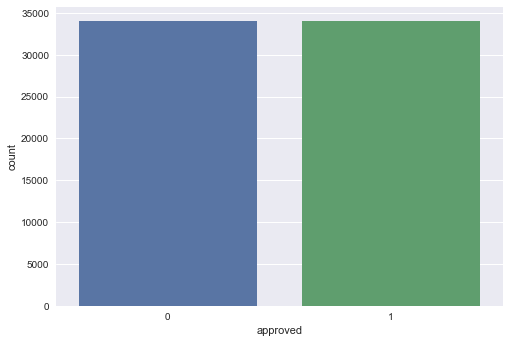

In [34]:
sns.countplot(pd.Series(y_sample))

Now we have balance data, so let's proceed with the train test split and will train our model.

## Train Test Split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X_sample,y_sample,test_size=0.2)

## Implement Machine Learning Models and Evaluations

In [36]:
# start with basic model (Logistic Regression)

reg=LogisticRegression(max_iter=1000)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

report=classification_report(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)

print('Classification Report:\n',report)
print('Confusion Matrix :\n',matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81      6798
           1       0.80      0.84      0.82      6808

    accuracy                           0.82     13606
   macro avg       0.82      0.82      0.82     13606
weighted avg       0.82      0.82      0.82     13606

Confusion Matrix :
 [[5418 1380]
 [1118 5690]]


In [37]:
# Now lets go for my favourite one 

random=RandomForestClassifier()
random.fit(X_train,y_train)
y_pred=random.predict(X_test)

report=classification_report(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)

print('Classification Report:\n',report)
print('Confusion Matrix :\n',matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      6798
           1       0.87      0.95      0.91      6808

    accuracy                           0.91     13606
   macro avg       0.91      0.91      0.91     13606
weighted avg       0.91      0.91      0.91     13606

Confusion Matrix :
 [[5843  955]
 [ 332 6476]]


## Hyper-Tuning Technique

In [38]:
params={'n_estimators':[i for i in  range(100,2000,200)],
      'max_depth':[1,2,4,5,10,15,20,30,35,40],
       'min_samples_split':[1,2,4,5,10,15,20],
       'min_samples_leaf':[1,2,6,8,10,15,20,25,30]}

clf= RandomForestClassifier()

model=RandomizedSearchCV(clf,param_distributions=params,cv=3)

model.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 2, 4, 5, 10, 15, 20,
                                                      30, 35, 40],
                                        'min_samples_leaf': [1, 2, 6, 8, 10, 15,
                                                             20, 25, 30],
                                        'min_samples_split': [1, 2, 4, 5, 10,
                                                              15, 20],
                                        'n_estimators': [100, 300, 500, 700,
                                                         900, 1100, 1300, 1500,
                                                         1700, 1900]})

In [39]:
model.best_score_

0.8310794424036906

hyper-tuning is not improving the accuracy, still we got the good accuracy.

We got almost 87% F1-Score without Hyper-Tuning.

<AxesSubplot:>

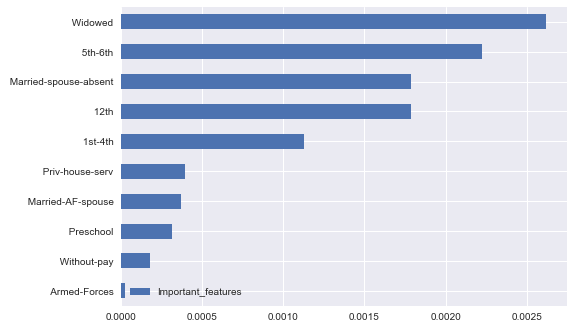

In [40]:
# Checking what are the top 10 features that are more important for the prediction.

features=pd.DataFrame({'Important_features':random.feature_importances_},index=X.columns)

features.sort_values(by='Important_features',ascending=True).head(10).plot(kind='barh')

### We can improve our model accuracy by:

1] Handling Outliers

2] Splitting train test data with cross validation

3] try to train and compare the accuracy with other models as well like, xgboost.

